In [1]:
# Example
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
dataset = pd.read_csv("bill_authentication.csv")
dataset.shape
dataset.head()
X = dataset.drop('Class', axis=1)
y = dataset['Class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
X

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [2]:
# Accuracy
from sklearn.metrics import accuracy_score
# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_pred)}")

Accuracy of the classifier is: 0.9854545454545455


[[157   1]
 [  3 114]]


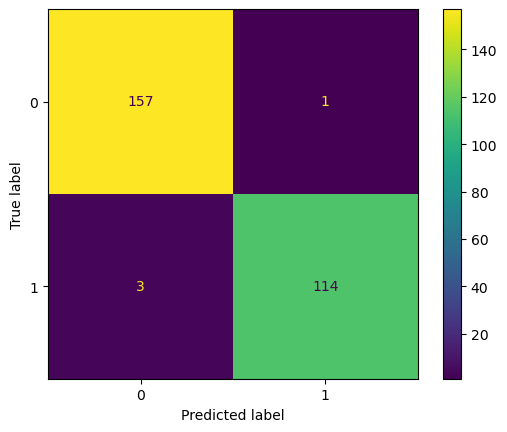

In [3]:
# Confusion Martrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# confusion_matrix funnction a matrix containing the summary of predictions
print(confusion_matrix(y_test, y_pred))

# ConfusionMatrixDisplay function is used to visualize the confusion matrix
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)
plt.show()

In [4]:
# Precision
from sklearn.metrics import precision_score

# Calculating the precision score of classifier
print(f"Precision Score of the classifier is: {precision_score(y_test, y_pred)}")

Precision Score of the classifier is: 0.991304347826087


In [5]:
# Recall
from sklearn.metrics import recall_score

# Calculating the recall score of classifier
print(f"Recall Score of the classifier is: {recall_score(y_test, y_pred)}")

Recall Score of the classifier is: 0.9743589743589743


In [6]:
# F1-score
from sklearn.metrics import f1_score

# Calculating the F1 score of classifier
print(f"F1 Score of the classifier is: {f1_score(y_test, y_pred)}")

F1 Score of the classifier is: 0.9827586206896551


AUC for our classifier is: 0.9840149302174619


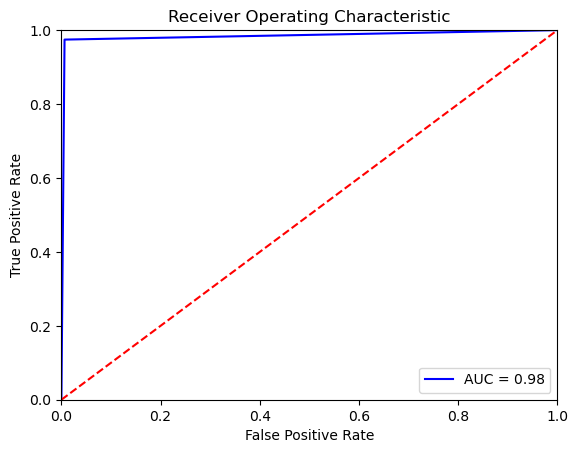

In [7]:
# ROC-AUC curve
from sklearn.metrics import roc_curve, auc

# class_probabilities = classifier.predict_proba(X_test)
# preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [8]:
# Feature Importance using SHAP values
# %pip install shap
import shap
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(X)

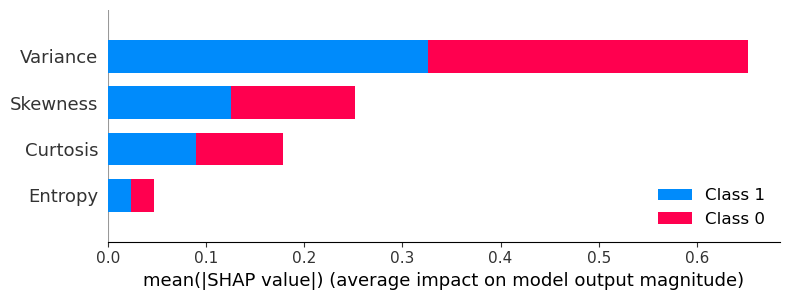

In [9]:
shap.summary_plot(shap_values, X_test.values, plot_type="bar",  feature_names = X.columns)